evaluating mode choice for SBB

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
# read text files 

df_benchmark = pd.read_csv("Benchmark_run-id.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_zero = pd.read_csv("run-id_Zero.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_current = pd.read_csv("run-id_current.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_reactive = pd.read_csv("run-id_line11_after4.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_equilibrium = pd.read_csv("run-id.EWD.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
#df_lineTen_ca = pd.read_csv("bInputPA_SBB_project_lineTen_ca05.28.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
df_line11 = pd.read_csv("run-id_line11.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)

df_IncCap_20 = pd.read_csv("run-id_incCap_20_WD_.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_IncCap_20_equi = pd.read_csv("run-id_20_equi.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)

#df_EOD_20 = pd.read_csv("bInputPA_EOD_20%_equi08.17.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
#df_EOD_100 = pd.read_csv("bInputPA_EOD_100%_equi08.17.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)

df_IncCap = pd.read_csv("run-id_incCap_100_WD_.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_IncCap_100_equi = pd.read_csv("run-id.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)

#line11_after4
#df_IncCap_wD_100_equi = pd.read_csv("bInputPA_SBB_project_line11_after406.10.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
#line11_after4 = pd.read_csv("line11_after4.person_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)



#line11
#df_IncCap_WD_20_equi = pd.read_csv("bInputPA_SBB_project_line11_WD_06.10.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)



In [3]:
df_benchmark.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [4]:
print (" this dataframe has a size of {}".format(len(df_benchmark)))
df_benchmark.head()

 this dataframe has a size of 94163


,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [5]:
df_benchmark["person Id"].astype(str)
df_benchmark.drop(df_benchmark[~df_benchmark["person Id"].str.isdigit()].index, inplace=True)
df_benchmark.reset_index(drop=True, inplace=True)
df_benchmark.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,1162862200,1,transit_walk,no,33197.0,unknown,unknown,33481.0,284.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown
1,1162862200,2,transit_walk,no,34397.0,unknown,unknown,34681.0,284.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown
2,1162862200,3,pt,no,58397.0,58571.0,unknown,58667.0,270.0,unknown,174.0,0.0,0.0,unknown,unknown,unknown,unknown
3,1162862200,4,transit_walk,no,63797.0,unknown,unknown,64143.0,346.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown
4,823636900,1,walk,no,43220.0,unknown,unknown,43675.0,455.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown


In [6]:
df_benchmark["person Id"].dtypes

dtype('O')

In [7]:
df_zero.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [8]:
df_current.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [9]:
scenarios=[df_benchmark,df_zero,df_current,df_reactive,df_equilibrium,
                 df_line11,df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]

In [10]:
#df_lineTen_ca,
for scenario in [df_benchmark,df_zero,df_current,df_reactive,df_equilibrium,
                 df_line11,df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]:
        scenario["person Id"].astype(str)
        scenario.drop(scenario[~scenario["person Id"].str.isdigit()].index, inplace=True)
        scenario.reset_index(drop=True, inplace = True)


In [11]:
df_benchmark= df_benchmark[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_zero= df_zero[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_current= df_current[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_reactive= df_reactive[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_equilibrium= df_equilibrium[["person Id","trip no.","mode","travel time (trip) [sec]"]]
#df_lineTen_ca= df_lineTen_ca[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_line11= df_line11[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap_20= df_IncCap_20[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap_20_equi= df_IncCap_20_equi[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap= df_IncCap[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap_100_equi= df_IncCap_100_equi[["person Id","trip no.","mode","travel time (trip) [sec]"]]

In [12]:
len(df_benchmark["person Id"].unique())

12072

In [13]:
len(df_current["person Id"].unique())

12072

In [14]:
len(df_IncCap_20_equi["person Id"].unique())

12072

In [15]:
len(df_reactive["person Id"].unique())

12072

In [16]:
df_reactive.head()

,person Id,trip no.,mode,travel time (trip) [sec]
0,1162862200,1,walk,284.0
1,1162862200,2,walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [17]:
df_benchmark.head(3)

,person Id,trip no.,mode,travel time (trip) [sec]
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0


# I filter here the agents ID

desired_person_ID = [1482897301,948954700,901209600,1022714900,1216100300,1510135400,1175800400,1152517500,1451638900,1213375200,
           1039022800,1146020000,1591322200,1584148800,1537550100,1273867100,1132438600,1595961800,1403941200,1234287800,
           1191567800,1521173100,1121550100,1047316900,1489785800,1598832900,1522548300,1474441500,1399254101,1296819000,
           1281528900,1389214900,927621500,1058147600,929416100,1498760000,1570257500,1501025500,1201853400,1076421600,
           815142300,1352284901,1208917200,814495600,1559639801,1138634100,1588174000,1196636900,1467951500,759555800,
           930177900,989300600,1532428300,1073018300,1485293900,1176712200,1101684001,1219642100,1468981100,1113676500,
           1591377500,833785000,1350253300,1134000300,914868100,1353032800,976144100,914693600,1208313400,1328334900,
           943928200,1590914601,1298388501,1416631400,1414496400,1345737400,810407400,849754800,883827200,758937400,
           988401500,898268000,928816901,1305429200,1127107600,1571127000,864576000,1169367600,1305771200,1263853700,
           926967800,1245610700,1323639800,1005064200,1370866400,1097279200,1541612200,1051477600,809814400,770157700,
           982315801,1225850100,1608915100,1178564500,1041356000,774337100,1256096300,1532847200,1369310600,1416639700,
           1221447100,1004340800,1434580000,1064200700,887310400,779094401,1344110200,793661700,811568800,1191347800,
           1024541200,868252900,1548016200,940966801,1351668001,960050700,878731400,1190168300,1113281800,1035353000,
           924984200,1191058800,1570052900,1518397400,1353032800,1113281800,1024541200,914693600,1076421600,758937400,
           1541612200,982315801,940966801,1559639801]
desired_person_ID = list(map(str, desired_person_ID))

In [18]:
desired_person_ID = [1482897301,948954700,901209600,1536782300,1022714900,1216100300,1510135400,1175800400,1152517500,1213375200,1039022800,1146020000,778510500,1248790800,
        1591322200,856290500,1584148800,1537550100,1273867100,1132438600,1595961800,1403941200,1234287800,1191567800,1521173100,881162800,1121550100,1047316900,
        1489785800,1598832900,1522548300,1474441500,1399254101,1281528900,1389214900,948012300,1058147600,1287943900,1498760000,1580232400,1570257500,1501025500,
        1201853400,1076421600,815142300,1352284901,1208917200,814495600,1559639801,1138634100,1588174000,858915900,1196636900,1467951500,797580500,759555800,
        1422887000,930177900,989300600,1532428300,1485293900,1176712200,1101684001,1219642100,1468981100,1113676500,1591377500,833785000,1350253300,1134000300,
        914868100,1353032800,914693600,1208313400,1328334900,943928200,1590914601,1298388501,1416631400,1414496400,810407400,849754800,883827200,758937400,
        1443550601,988401500,898268000,1456171500,928816901,1305429200,1127107600,1571127000,864576000,1169367600,1305771200,1263853700,926967800,1323639800,
        1005064200,1370866400,1097279200,1541612200,1051477600,770157700,982315801,1608915100,1276111100,1178564500,1041356000,774337100,1256096300,1532847200,
        1369310600,1095586400,1416639700,1221447100,1004340800,1434580000,1064200700,887310400,779094401,817551300,1344110200,1288553500,793661700,811568800,
        1191347800,1024541200,868252900,1548016200,940966801,1351668001,960050700,878731400,1103878500,1190168300,924984200,1191058800,1570052900,1518397400]
desired_person_ID = list(map(str, desired_person_ID))

desired_person_ID = [758937400,1288553500,940966801, 1482897301,948954700,901209600,1022714900,1216100300,1510135400,
                     1175800400,1152517500,1451638900,1213375200,1039022800,1146020000,1591322200,1584148800,1537550100,
                     1273867100,1132438600,1595961800,1403941200,1234287800,1191567800,1521173100,1121550100,1047316900,
                     1489785800,1598832900,1522548300,1474441500,1399254101,1296819000,1281528900,1389214900,927621500,
                     1058147600,929416100,1498760000,1570257500,1501025500,1201853400,1076421600,815142300,1352284901,
                     1208917200,814495600,1559639801,1138634100,1588174000,1196636900,1467951500,759555800,930177900,
                     989300600,1532428300,1073018300,1485293900,1176712200,1101684001,1219642100,1468981100,1113676500,
                     1591377500,833785000,1350253300,1134000300,914868100,1353032800,976144100,914693600,1208313400,
                     1328334900,943928200,1590914601,1298388501,1416631400,1414496400,1345737400,810407400,849754800,
                     883827200,758937400,988401500,898268000,928816901,1305429200,1127107600,1571127000,864576000,
                     1169367600,1305771200,1263853700,926967800,1245610700,1323639800,1005064200,1370866400,1097279200,
                     1541612200,1051477600,809814400,770157700,982315801,1225850100,1608915100,1178564500,1041356000,
                     774337100,1256096300,1532847200,1369310600,1416639700,1221447100,1004340800,1434580000,1064200700,
                     887310400,779094401,1344110200,793661700,811568800,1191347800,1024541200,868252900,1548016200,
                     940966801,1351668001,960050700,878731400,1190168300,1113281800,1035353000,924984200,1191058800,
                     1570052900,1518397400,]
desired_person_ID = list(map(str, desired_person_ID))

In [19]:
len(desired_person_ID)

140

In [20]:
len(set(desired_person_ID))

140

In [21]:
df_benchmark['person Id']

0        1162862200
1        1162862200
2        1162862200
3        1162862200
4         823636900
            ...    
46926    1149185100
46927    1149185100
46928    1149185100
46929    1341509000
46930    1341509000
Name: person Id, Length: 46931, dtype: object

In [22]:
#df_benchmark['person Id'] = df_benchmark['person Id'].apply(lambda _: str(_))

In [23]:
#df_benchmark['person Id'].to_string()

In [24]:
#df_benchmark["person Id"].astype('|S')

In [25]:
#df_benchmark["person Id"].astype("object")

In [26]:
#df_benchmark['person Id'].apply(str)

In [27]:
#df_benchmark['person Id'].astype(str)
#df_benchmark['person Id'].head()

In [28]:
df_benchmark['person Id'].dtypes

dtype('O')

In [29]:
type(df_benchmark['person Id']) 

pandas.core.series.Series

for scenario in scenarios:
    scenario["person Id"].astype(str)
    scenario=scenario[scenario["person Id"].isin(desired_person_ID)]
    #scenario.drop(scenario[~scenario["personId"].isin(desired_person_ID)].reset_index(drop=True))
    scenario.reset_index(drop=True, inplace = True)

In [30]:
for scenario in [df_benchmark,df_zero,df_current,df_reactive,df_equilibrium,
                 df_line11,df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]:
    scenario.drop(scenario.loc[~scenario["person Id"].isin(desired_person_ID)].index, inplace=True)
    #scenario.drop(scenario[~scenario["personId"].isin(desired_person_ID)].reset_index(drop=True))
    scenario.reset_index(drop=True, inplace = True)

c:\apps\python353\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
len(df_reactive["person Id"].unique())

140

In [32]:
df_benchmark[df_benchmark["person Id"]=="1101684001"]

,person Id,trip no.,mode,travel time (trip) [sec]
190,1101684001,1,pt,1572.0
191,1101684001,2,pt,2715.0
192,1101684001,3,pt,4805.0
193,1101684001,4,transit_walk,1212.0


In [33]:
len(df_benchmark["person Id"].unique())

140

In [34]:
df_reactive["person Id"].dtype

dtype('O')

In [35]:
#df_benchmark = df_benchmark[df_benchmark["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_benchmark = df_benchmark.add_suffix("_EOD").rename(columns={"person Id_EOD": "personId"})
df_benchmark.head()

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,2485.0
3,1047316900,4,pt,2256.0
4,1323639800,1,pt,2456.0


In [36]:
len(df_reactive["person Id"].unique())

140

df_EOD_20 = df_EOD_20.add_suffix("_EOD_20%incCap").rename(columns={"person Id_EOD_20%incCap": "personId"})
df_EOD_20.head()

df_EOD_100 = df_EOD_100.add_suffix("_EOD_100%incCap").rename(columns={"personId_EOD_100%incCap": "personId"})
df_EOD_100.head()

In [37]:
#df_reactive = df_reactive[df_reactive["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_reactive = df_reactive.add_suffix("_start of disruption").rename(columns={"person Id_start of disruption": "personId"})
df_reactive.head()

,personId,trip no._start of disruption,mode_start of disruption,travel time (trip) [sec]_start of disruption
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3184.0
3,1047316900,4,pt,2257.0
4,1323639800,1,pt,2456.0


In [38]:
df_benchmark[df_benchmark["personId"] == "1221447100"]

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
131,1221447100,1,transit_walk,0.0
132,1221447100,2,pt,2121.0
133,1221447100,3,pt,2006.0


#df_lineTen_ca = df_lineTen_ca[df_lineTen_ca["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_lineTen_ca = df_lineTen_ca.add_suffix("_lineTen_ca").rename(columns={"person Id_lineTen_ca": "personId"})
df_lineTen_ca.head()

#df_lineTen_Schedule = df_lineTen_Schedule[df_lineTen_Schedule["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_lineTen_Schedule = df_lineTen_Schedule.add_suffix("_lineTen_Schedule").rename(columns={"person Id_lineTen_Schedule": "personId"})
df_lineTen_Schedule.head()

In [39]:
#df_IncCap = df_IncCap[df_IncCap["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap = df_IncCap.add_suffix("_IncCap").rename(columns={"person Id_IncCap": "personId"})
df_IncCap.head()

,personId,trip no._IncCap,mode_IncCap,travel time (trip) [sec]_IncCap
0,1047316900,1,pt,2485.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3184.0
3,1047316900,4,pt,2257.0
4,1323639800,1,pt,1976.0


In [40]:
#df_IncCap_100_equi = df_IncCap_100_equi[df_IncCap_100_equi["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_100_equi = df_IncCap_100_equi.add_suffix("_IncCap_100_equi").rename(columns={"person Id_IncCap_100_equi": "personId"})
df_IncCap_100_equi.head()

,personId,trip no._IncCap_100_equi,mode_IncCap_100_equi,travel time (trip) [sec]_IncCap_100_equi
0,1047316900,1,pt,2485.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3183.0
3,1047316900,4,pt,2256.0
4,1323639800,1,pt,1976.0


#df_line11_after4 = df_line11_after4[df_line11_after4["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_line11_after4 = df_line11_after4.add_suffix("_line11_after4").rename(columns={"person Id_line11_after4": "personId"})
df_line11_after4.head()

In [41]:
#df_line11_after4 = df_line11_after4[df_line11_after4["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_line11= df_line11.add_suffix("_line11").rename(columns={"person Id_line11": "personId"})
df_line11.head()

,personId,trip no._line11,mode_line11,travel time (trip) [sec]_line11
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3184.0
3,1047316900,4,pt,2257.0
4,1323639800,1,pt,1976.0


In [42]:
#df_equilibrium = df_equilibrium[df_equilibrium["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_equilibrium = df_equilibrium.add_suffix("_EWD").rename(columns={"person Id_EWD": "personId"})
df_equilibrium.head()

,personId,trip no._EWD,mode_EWD,travel time (trip) [sec]_EWD
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3183.0
3,1047316900,4,pt,2256.0
4,1323639800,1,pt,2456.0


In [43]:
#df_current = df_current[df_current["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_current = df_current.add_suffix("_start of trip").rename(columns={"person Id_start of trip": "personId"})
df_current.head()

,personId,trip no._start of trip,mode_start of trip,travel time (trip) [sec]_start of trip
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3184.0
3,1047316900,4,pt,2257.0
4,1323639800,1,pt,2456.0


In [44]:
#df_zero = df_zero[df_zero["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_zero = df_zero.add_suffix("_no information").rename(columns={"person Id_no information": "personId"})
df_zero.head()

,personId,trip no._no information,mode_no information,travel time (trip) [sec]_no information
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3182.0
3,1047316900,4,pt,2257.0
4,1323639800,1,pt,2456.0


In [45]:
#df_IncCap_20 = df_IncCap_20[df_IncCap_20["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_20 = df_IncCap_20.add_suffix("_IncCap_20").rename(columns={"person Id_IncCap_20": "personId"})
df_IncCap_20.head()

,personId,trip no._IncCap_20,mode_IncCap_20,travel time (trip) [sec]_IncCap_20
0,1047316900,1,pt,2485.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3184.0
3,1047316900,4,pt,2257.0
4,1323639800,1,pt,1976.0


In [46]:
#df_IncCap_20_equi = df_IncCap_20_equi[df_IncCap_20_equi["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_20_equi = df_IncCap_20_equi.add_suffix("_IncCap_20_equi").rename(columns={"person Id_IncCap_20_equi": "personId"})
df_IncCap_20_equi.head()

,personId,trip no._IncCap_20_equi,mode_IncCap_20_equi,travel time (trip) [sec]_IncCap_20_equi
0,1047316900,1,pt,2485.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,3183.0
3,1047316900,4,pt,2256.0
4,1323639800,1,pt,1976.0


In [47]:
df_benchmark[df_benchmark["personId"] == "1350253300"]

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
348,1350253300,1,pt,2801.0
349,1350253300,2,pt,1581.0
350,1350253300,3,transit_walk,2024.0
351,1350253300,4,transit_walk,1574.0
352,1350253300,5,transit_walk,514.0
353,1350253300,6,walk,1036.0
354,1350253300,7,pt,1325.0
355,1350253300,8,pt,1917.0


In [48]:
df_reactive[df_reactive["personId"] == "1350253300"]

,personId,trip no._start of disruption,mode_start of disruption,travel time (trip) [sec]_start of disruption
342,1350253300,1,car,457.0
343,1350253300,2,car,368.0
344,1350253300,3,car,288.0
345,1350253300,4,car,377.0
346,1350253300,5,transit_walk,514.0
347,1350253300,6,walk,1036.0
348,1350253300,7,pt,1209.0
349,1350253300,8,pt,1918.0


In [49]:
#df_benchmark.to_excel("modeShare_df_benchmark.xlsx")
#df_reactive.to_excel("modeShare_df_reactive.xlsx")

# Evaluation for train and non-train 

In [50]:
mylist_bus = ["BRE","VBZ","AAG","BOS","Ext","PAG","RBL","REG","RVB","SBF","SBW","VBG","VBL","VZO","WTZ","ZVB","ARA",
              "BBA","BLW","BOG"]
#mylist_rail = ["BDW","FB","RB","SOB","SZU","THU","WSB","AB"]
#mylist_funicular = ["DBZ","ZBB", "VBZ_line23", "PBZ_line24"]
#mylist_ferry = ["FHM","SGG","ZSG"]
other = ["VBZ_line23"]
mylist_other = ["DBZ","ZBB", "PBZ_line24","FHM","SGG","ZSG"]
#mylist_train = ["SBB"]
mylist_train = ["SBB","BDW","FB","RB","SOB","SZU","THU","WSB","AB"]
mylist_tram = ["VBZ_line9", "VBZ_line8", "VBZ_line7", "VBZ_line6", "VBZ_line5","VBZ_line4", "VBZ_line3","VBZ_line2", 
               "VBZ_line17","VBZ_line15", "VBZ_line14", "VBZ_line13","VBZ_line12", "VBZ_line11", "VBZ_line10"]

modeshare_allagent_WD= pd.DataFrame()
#scenarios = [df_benchmark,df_equilibrium,df_reactive,df_lineTen_ca,df_lineTen_Schedule,df_IncCap,df_IncCap_100_equi,
   #             df_IncCap_20,df_IncCap_20_equi,df_line11_after4,df_current,df_zero]
             
#keys = ["EOD",'EWD','start of disruption','lineTen_ca','lineTen_Schedule','IncCap','IncCap_100_equi',
          #     'IncCap_20','IncCap_20_equi','line11','start of trip','no information']

#scenarios = [df_benchmark,df_EOD_20,df_EOD_100,df_equilibrium,df_IncCap_20_equi, df_IncCap_100_equi]

#keys = ["EOD",'EOD_20%incCap','EOD_100%incCap','EWD','IncCap_20_equi','IncCap_100_equi']

scenarios = [df_benchmark,df_zero,df_reactive,df_equilibrium,df_line11,
             df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]
             
keys = ["EOD",'no information','start of disruption','EWD','line11',
        #'lineTen_ca',
        'IncCap_20','IncCap_20_equi','IncCap','IncCap_100_equi']


In [51]:
df_benchmark.head()

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
0,1047316900,1,pt,6088.0
1,1047316900,2,pt,2277.0
2,1047316900,3,pt,2485.0
3,1047316900,4,pt,2256.0
4,1323639800,1,pt,2456.0


In [52]:
df_benchmark["travel time (trip) [sec]_EOD"].astype(np.float16)

0      6088.0
1      2276.0
2      2484.0
3      2256.0
4      2456.0
        ...  
544     881.0
545    1794.0
546    1729.0
547     418.0
548     716.0
Name: travel time (trip) [sec]_EOD, Length: 549, dtype: float16

# Evaluations

In [53]:
df_benchmark['travel time (trip) [sec]_EOD'] = df_benchmark['travel time (trip) [sec]_EOD'].astype(float)
df_benchmark['travel time (trip) [sec]_EOD'] = pd.to_numeric(df_benchmark['travel time (trip) [sec]_EOD'], errors='coerce')
df1 = df_benchmark.groupby('mode_EOD', as_index=False)['travel time (trip) [sec]_EOD'].sum()
travelDis_allagent=df1.copy()
df1

,mode_EOD,travel time (trip) [sec]_EOD
0,bike,3211.0
1,car,105260.0
2,pt,803353.0
3,transit_walk,25197.0
4,walk,14539.0


In [54]:
df_reactive[df_reactive['travel time (trip) [sec]_start of disruption'].str.isspace()== True]

,personId,trip no._start of disruption,mode_start of disruption,travel time (trip) [sec]_start of disruption


In [55]:
df_reactive['travel time (trip) [sec]_start of disruption'].str.isspace()

0      False
1      False
2      False
3      False
4      False
       ...  
536    False
537    False
538    False
539    False
540    False
Name: travel time (trip) [sec]_start of disruption, Length: 541, dtype: bool

In [56]:
df_reactive['travel time (trip) [sec]_start of disruption'].values

array(['6088.0', '2277.0', '3184.0', '2257.0', '2456.0', '1971.0',
       '3176.0', '2685.0', '2623.0', '226.0', '226.0', '2824.0', '220.0',
       '152.0', '110.0', '283.0', '283.0', '2769.0', '3158.0', '2999.0',
       '1332.0', '9738.0', '3183.0', '3436.0', '1823.0', '7610.0',
       '2907.0', '1910.0', '1757.0', '403.0', '221.0', '1585.0', '1454.0',
       '384.0', '1724.0', '1585.0', '2547.0', '2125.0', '2874.0',
       '1244.0', '4509.0', '1586.0', '3469.0', '2237.0', '1087.0',
       '1008.0', '2072.0', '2274.0', '2967.0', '4658.0', '1370.0',
       '1851.0', '1677.0', '1182.0', '3555.0', '4213.0', '2649.0',
       '4494.0', '3077.0', '4560.0', '2732.0', '1101.0', '1318.0', '0.0',
       '1673.0', '2317.0', '3329.0', '484.0', '3036.0', '392.0', '392.0',
       '3655.0', '1160.0', '1925.0', '589.0', '3222.0', '2234.0',
       '2170.0', '2142.0', '2327.0', '2535.0', '1773.0', '1721.0',
       '1298.0', '635.0', '572.0', '567.0', '663.0', '711.0', '2705.0',
       '1957.0', '2495.0

In [57]:
#df["fruit"] = df["fruit"].astype("|S")
#weather["Temp"] = weather["Temp"].convert_objects(convert_numeric=True)
#df_reactive['travel time (trip) [sec]_start of disruption'] = df_reactive['travel time (trip) [sec]_start of disruption'].convert_objects(convert_numeric=True)

df_reactive['travel time (trip) [sec]_start of disruption'] = df_reactive['travel time (trip) [sec]_start of disruption'].astype(str)
df_reactive['travel time (trip) [sec]_start of disruption'] = pd.to_numeric(df_reactive['travel time (trip) [sec]_start of disruption'], errors='coerce')
df2 = df_reactive.groupby('mode_start of disruption', as_index=False)['travel time (trip) [sec]_start of disruption'].sum()
df2

,mode_start of disruption,travel time (trip) [sec]_start of disruption
0,bike,2967.0
1,car,32667.0
2,pt,1006722.0
3,transit_walk,34406.0
4,walk,15188.0


In [58]:
travelDis_allagent["travel time (trip) [sec]_start of disruption"]=df2["travel time (trip) [sec]_start of disruption"]

In [59]:
df_equilibrium['travel time (trip) [sec]_EWD'] = df_equilibrium['travel time (trip) [sec]_EWD'].astype(float)
df_equilibrium['travel time (trip) [sec]_EWD'] = pd.to_numeric(df_equilibrium['travel time (trip) [sec]_EWD'], errors='coerce')
df3 = df_equilibrium.groupby('mode_EWD', as_index=False)['travel time (trip) [sec]_EWD'].sum()
df3

,mode_EWD,travel time (trip) [sec]_EWD
0,bike,20311.0
1,car,110050.0
2,pt,855412.0
3,transit_walk,23108.0
4,walk,23906.0


In [60]:
travelDis_allagent["travel time (trip) [sec]_EWD"]=df3["travel time (trip) [sec]_EWD"]

In [61]:
df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'] = df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'].astype(float)
df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'] = pd.to_numeric(df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'], errors='coerce')
df4 = df_IncCap_100_equi.groupby('mode_IncCap_100_equi', as_index=False)['travel time (trip) [sec]_IncCap_100_equi'].sum()
df4

,mode_IncCap_100_equi,travel time (trip) [sec]_IncCap_100_equi
0,bike,3951.0
1,car,107446.0
2,pt,804034.0
3,transit_walk,23283.0
4,walk,20728.0


In [62]:
travelDis_allagent["travel time (trip) [sec]_IncCap_100_equi"]=df4["travel time (trip) [sec]_IncCap_100_equi"]

In [63]:
df_IncCap['travel time (trip) [sec]_IncCap'] = df_IncCap['travel time (trip) [sec]_IncCap'].astype(float)
df_IncCap['travel time (trip) [sec]_IncCap'] = pd.to_numeric(df_IncCap['travel time (trip) [sec]_IncCap'], errors='coerce')
df5 = df_IncCap.groupby('mode_IncCap', as_index=False)['travel time (trip) [sec]_IncCap'].sum()
df5

,mode_IncCap,travel time (trip) [sec]_IncCap
0,bike,2967.0
1,car,33112.0
2,pt,953707.0
3,transit_walk,34406.0
4,walk,15188.0


In [64]:
travelDis_allagent["travel time (trip) [sec]_IncCap"]=df5["travel time (trip) [sec]_IncCap"]

In [65]:
df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'] = df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'].astype(float)
df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'] = pd.to_numeric(df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'], errors='coerce')
df6 = df_IncCap_20_equi.groupby('mode_IncCap_20_equi', as_index=False)['travel time (trip) [sec]_IncCap_20_equi'].sum()
df6

,mode_IncCap_20_equi,travel time (trip) [sec]_IncCap_20_equi
0,bike,3985.0
1,car,96226.0
2,pt,844517.0
3,transit_walk,25001.0
4,walk,18255.0


In [66]:
travelDis_allagent["travel time (trip) [sec]_IncCap_20_equi"]=df6["travel time (trip) [sec]_IncCap_20_equi"]

In [67]:
df_IncCap_20['travel time (trip) [sec]_IncCap_20'] = df_IncCap_20['travel time (trip) [sec]_IncCap_20'].astype(float)
df_IncCap_20['travel time (trip) [sec]_IncCap_20'] = pd.to_numeric(df_IncCap_20['travel time (trip) [sec]_IncCap_20'], errors='coerce')
df7 = df_IncCap_20.groupby('mode_IncCap_20', as_index=False)['travel time (trip) [sec]_IncCap_20'].sum()
df7

,mode_IncCap_20,travel time (trip) [sec]_IncCap_20
0,bike,2967.0
1,car,33112.0
2,pt,953707.0
3,transit_walk,34406.0
4,walk,15188.0


In [68]:
travelDis_allagent["travel time (trip) [sec]_IncCap_20"]=df7["travel time (trip) [sec]_IncCap_20"]

In [69]:
df_zero['travel time (trip) [sec]_no information'] = df_zero['travel time (trip) [sec]_no information'].astype(float)
df_zero['travel time (trip) [sec]_no information'] = pd.to_numeric(df_zero['travel time (trip) [sec]_no information'], errors='coerce')
df8 = df_zero.groupby('mode_no information', as_index=False)['travel time (trip) [sec]_no information'].sum()
df8

,mode_no information,travel time (trip) [sec]_no information
0,bike,2999.0
1,car,103802.0
2,pt,1453519.0
3,transit_walk,24373.0
4,walk,11813.0


In [70]:
travelDis_allagent["travel time (trip) [sec]_no information"]=df8["travel time (trip) [sec]_no information"]

In [71]:
df_line11['travel time (trip) [sec]_line11'] = df_line11['travel time (trip) [sec]_line11'].astype(str)
df_line11['travel time (trip) [sec]_line11'] = pd.to_numeric(df_line11['travel time (trip) [sec]_line11'], errors='coerce')
df9 = df_line11.groupby('mode_line11', as_index=False)['travel time (trip) [sec]_line11'].sum()
df9

,mode_line11,travel time (trip) [sec]_line11
0,bike,2967.0
1,car,32667.0
2,pt,1006244.0
3,transit_walk,34406.0
4,walk,15188.0


In [72]:
travelDis_allagent["travel time (trip) [sec]_line11"]=df9["travel time (trip) [sec]_line11"]
travelDis_allagent

,mode_EOD,travel time (trip) [sec]_EOD,travel time (trip) [sec]_start of disruption,travel time (trip) [sec]_EWD,travel time (trip) [sec]_IncCap_100_equi,travel time (trip) [sec]_IncCap,travel time (trip) [sec]_IncCap_20_equi,travel time (trip) [sec]_IncCap_20,travel time (trip) [sec]_no information,travel time (trip) [sec]_line11
0,bike,3211.0,2967.0,20311.0,3951.0,2967.0,3985.0,2967.0,2999.0,2967.0
1,car,105260.0,32667.0,110050.0,107446.0,33112.0,96226.0,33112.0,103802.0,32667.0
2,pt,803353.0,1006722.0,855412.0,804034.0,953707.0,844517.0,953707.0,1453519.0,1006244.0
3,transit_walk,25197.0,34406.0,23108.0,23283.0,34406.0,25001.0,34406.0,24373.0,34406.0
4,walk,14539.0,15188.0,23906.0,20728.0,15188.0,18255.0,15188.0,11813.0,15188.0


In [73]:
travelDis_allagent.rename(columns={"mode_EOD":"mode"
    ,"travel time (trip) [sec]_EOD":"Normal day",
                                         "travel time (trip) [sec]_start of disruption":"start of disruption",
                                         "travel time (trip) [sec]_no information":"No information",
                                             "travel time (trip) [sec]_EWD":"Equilibrium+disruption",
                                #"lineTen_ca":"2x10",
                                             "travel time (trip) [sec]_line11":"Line11-Large",
                                 "travel time (trip) [sec]_IncCap":"Large-allDay",
                                         "travel time (trip) [sec]_IncCap_100_equi":"Equilibrium+Large",
                                 "travel time (trip) [sec]_IncCap_20":"Medium-allDay",
                                         "travel time (trip) [sec]_IncCap_20_equi":"Equilibrium+Medium"}, inplace = True)

In [74]:
travelDis_allagent =travelDis_allagent[['mode',"Normal day",'No information',
                                                            'start of disruption',"Equilibrium+disruption",
                                                           "Line11-Large", "Medium-allDay",
                                                           "Equilibrium+Medium",
                                        "Large-allDay",
                                                           "Equilibrium+Large"]]
travelDis_allagent

,mode,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
0,bike,3211.0,2999.0,2967.0,20311.0,2967.0,2967.0,3985.0,2967.0,3951.0
1,car,105260.0,103802.0,32667.0,110050.0,32667.0,33112.0,96226.0,33112.0,107446.0
2,pt,803353.0,1453519.0,1006722.0,855412.0,1006244.0,953707.0,844517.0,953707.0,804034.0
3,transit_walk,25197.0,24373.0,34406.0,23108.0,34406.0,34406.0,25001.0,34406.0,23283.0
4,walk,14539.0,11813.0,15188.0,23906.0,15188.0,15188.0,18255.0,15188.0,20728.0


In [75]:
travelDis_allagent.reset_index(drop=True, inplace=True)
travelDis_allagent.set_index('mode', inplace=True)
travelDis_allagent

,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
mode,,,,,,,,,
bike,3211.0,2999.0,2967.0,20311.0,2967.0,2967.0,3985.0,2967.0,3951.0
car,105260.0,103802.0,32667.0,110050.0,32667.0,33112.0,96226.0,33112.0,107446.0
pt,803353.0,1453519.0,1006722.0,855412.0,1006244.0,953707.0,844517.0,953707.0,804034.0
transit_walk,25197.0,24373.0,34406.0,23108.0,34406.0,34406.0,25001.0,34406.0,23283.0
walk,14539.0,11813.0,15188.0,23906.0,15188.0,15188.0,18255.0,15188.0,20728.0


In [76]:
travelDis_allagent_min=travelDis_allagent.copy()
for column in travelDis_allagent_min[["Normal day",'No information','start of disruption',
                                      "Equilibrium+disruption","Line11-Large",
                                      "Medium-allDay","Equilibrium+Medium",
                                      "Large-allDay","Equilibrium+Large"]]:
    
    travelDis_allagent_min[column]=travelDis_allagent_min[column]/60

In [77]:
travelDis_allagent_min = travelDis_allagent_min.round(2)
travelDis_allagent_min

,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
mode,,,,,,,,,
bike,53.52,49.98,49.45,338.52,49.45,49.45,66.42,49.45,65.85
car,1754.33,1730.03,544.45,1834.17,544.45,551.87,1603.77,551.87,1790.77
pt,13389.22,24225.32,16778.70,14256.87,16770.73,15895.12,14075.28,15895.12,13400.57
transit_walk,419.95,406.22,573.43,385.13,573.43,573.43,416.68,573.43,388.05
walk,242.32,196.88,253.13,398.43,253.13,253.13,304.25,253.13,345.47


In [78]:
travelDis_allagent_min.drop('transit_walk', inplace = True)

#df.insert(loc=idx, column='A', value=new_col)
#travelDis_allagent_min.insert(0,column="mode",value=["bike",'car','pt','transit_walk','walk'])
travelDis_allagent_min1=travelDis_allagent_min.reindex(['pt','car','transit_walk',"bike",'walk'])
travelDis_allagent_min1

In [79]:
travelDis_allagent_min_sum=travelDis_allagent_min.copy()
heads=["Normal day",'No information','start of disruption',
                                      "Equilibrium+disruption","Line11-Large",
                                      "Medium-allDay","Equilibrium+Medium",
                                      "Large-allDay","Equilibrium+Large"]
travelDis_allagent_min_sum.loc['sum']=int (0)
for head in heads:
    travelDis_allagent_min_sum[head].loc['sum']=travelDis_allagent_min_sum[head].sum()
    
travelDis_allagent_min_sum    

,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
mode,,,,,,,,,
bike,53.52,49.98,49.45,338.52,49.45,49.45,66.42,49.45,65.85
car,1754.33,1730.03,544.45,1834.17,544.45,551.87,1603.77,551.87,1790.77
pt,13389.22,24225.32,16778.70,14256.87,16770.73,15895.12,14075.28,15895.12,13400.57
walk,242.32,196.88,253.13,398.43,253.13,253.13,304.25,253.13,345.47
sum,15439.39,26202.21,17625.73,16827.99,17617.76,16749.57,16049.72,16749.57,15602.66


In [80]:
travelDis_allagent_min_sum_swap= travelDis_allagent_min_sum.T
travelDis_allagent_min_sum_swap

mode,bike,car,pt,walk,sum
Normal day,53.52,1754.33,13389.22,242.32,15439.39
No information,49.98,1730.03,24225.32,196.88,26202.21
start of disruption,49.45,544.45,16778.70,253.13,17625.73
Equilibrium+disruption,338.52,1834.17,14256.87,398.43,16827.99
Line11-Large,49.45,544.45,16770.73,253.13,17617.76
Medium-allDay,49.45,551.87,15895.12,253.13,16749.57
Equilibrium+Medium,66.42,1603.77,14075.28,304.25,16049.72
Large-allDay,49.45,551.87,15895.12,253.13,16749.57
Equilibrium+Large,65.85,1790.77,13400.57,345.47,15602.66


In [81]:
travelDis_allagent_min_sum_swap=travelDis_allagent_min_sum_swap[['pt','car',"bike",'walk','sum']]

In [82]:
#df_modeshare_allagent_WD.drop(['pt'], inplace=True)
travelDis_allagent_min_sum_swap.to_excel("travelTime_per_mode_tripbased_WholeDay_DirectAgents_category.xlsx")

In [83]:
#df_modeshare_allagent_WD.rename({"leg":"pt"}, inplace=True)
travelDis_allagent_min_swap= travelDis_allagent_min.T
travelDis_allagent_min_swap

mode,bike,car,pt,walk
Normal day,53.52,1754.33,13389.22,242.32
No information,49.98,1730.03,24225.32,196.88
start of disruption,49.45,544.45,16778.70,253.13
Equilibrium+disruption,338.52,1834.17,14256.87,398.43
Line11-Large,49.45,544.45,16770.73,253.13
Medium-allDay,49.45,551.87,15895.12,253.13
Equilibrium+Medium,66.42,1603.77,14075.28,304.25
Large-allDay,49.45,551.87,15895.12,253.13
Equilibrium+Large,65.85,1790.77,13400.57,345.47


In [84]:
travelDis_allagent_min_swap=travelDis_allagent_min_swap[['pt','car',"bike",'walk']]
travelDis_allagent_min_swap

mode,pt,car,bike,walk
Normal day,13389.22,1754.33,53.52,242.32
No information,24225.32,1730.03,49.98,196.88
start of disruption,16778.70,544.45,49.45,253.13
Equilibrium+disruption,14256.87,1834.17,338.52,398.43
Line11-Large,16770.73,544.45,49.45,253.13
Medium-allDay,15895.12,551.87,49.45,253.13
Equilibrium+Medium,14075.28,1603.77,66.42,304.25
Large-allDay,15895.12,551.87,49.45,253.13
Equilibrium+Large,13400.57,1790.77,65.85,345.47


In [85]:
travelDis_allagent_min_swap.to_excel("raw data travelDis_directly_min_swap.xlsx")

In [86]:
df_percentage_travelDis_allagent_min = travelDis_allagent_min_swap.div(travelDis_allagent_min_swap.sum(axis=1), axis=0).mul(100).round(2)
df_percentage_travelDis_allagent_min

mode,pt,car,bike,walk
Normal day,86.72,11.36,0.35,1.57
No information,92.46,6.60,0.19,0.75
start of disruption,95.19,3.09,0.28,1.44
Equilibrium+disruption,84.72,10.90,2.01,2.37
Line11-Large,95.19,3.09,0.28,1.44
Medium-allDay,94.90,3.29,0.30,1.51
Equilibrium+Medium,87.70,9.99,0.41,1.90
Large-allDay,94.90,3.29,0.30,1.51
Equilibrium+Large,85.89,11.48,0.42,2.21


In [87]:
df_percentage_travelDis_allagent_min= df_percentage_travelDis_allagent_min[["pt","car","bike","walk"]]

In [88]:
df_percentage_travelDis_allagent_min.to_excel("Traveltime_percentage_directly agents.xlsx")

In [89]:
travelDis_allagent_min_swap= travelDis_allagent_min_swap[["pt","car","walk","bike"]]

In [90]:
travelDis_allagent_min_swap_reduced=travelDis_allagent_min_swap.loc[["Normal day","start of disruption",
                                                         "Equilibrium+disruption","Medium-allDay","Equilibrium+Medium"]]
travelDis_allagent_min_swap_reduced.rename(columns={"pt":"PT"}, inplace=True)

In [110]:
travelDis_allagent_min_swap_reduced

mode,PT,car,walk,bike
Normal day,13389.22,1754.33,242.32,53.52
start of disruption,16778.70,544.45,253.13,49.45
Equilibrium+disruption,14256.87,1834.17,398.43,338.52
Medium-allDay,15895.12,551.87,253.13,49.45
Equilibrium+Medium,14075.28,1603.77,304.25,66.42


In [111]:
travelDis_allagent_min_swap_reduced=(travelDis_allagent_min_swap_reduced/60).round(2)
travelDis_allagent_min_swap_reduced

mode,PT,car,walk,bike
Normal day,223.15,29.24,4.04,0.89
start of disruption,279.65,9.07,4.22,0.82
Equilibrium+disruption,237.61,30.57,6.64,5.64
Medium-allDay,264.92,9.20,4.22,0.82
Equilibrium+Medium,234.59,26.73,5.07,1.11


c:\apps\python353\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


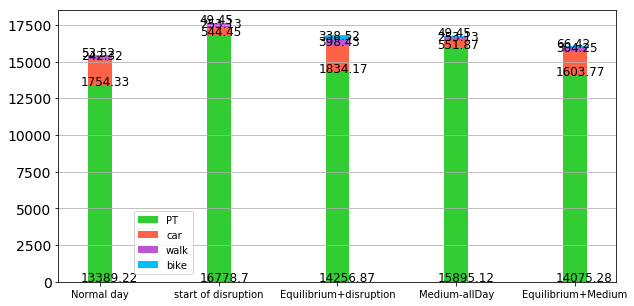

In [91]:
colors = ['limegreen','tomato','mediumorchid','deepskyblue']
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
#ax = (travelDis_allagent_min_swap_reduced.div(travelDis_allagent_min_swap_reduced.sum(1), axis=0)).plot(kind='bar',
 #           stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax = travelDis_allagent_min_swap_reduced.plot(kind='bar',
            stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax.yaxis.grid(True)
ax.set_facecolor('xkcd:white')
plt.legend(labels=travelDis_allagent_min_swap_reduced.columns,fontsize= 12)
plt.legend(loc='lower right', bbox_to_anchor=(0.25, 0.01))
#plt.xticks(horizontalalignment="middle")
#plt.title("Percentage of mode choice analysis in scenarios for all agents",fontsize= 16)

#plt.xticks(fontsize=10,rotation=17)
plt.xticks(fontsize=10,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks(fontsize=14)



# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate('{:0.2%}'.format(height), (x - 0.06, y +  0.03),fontsize=12,weight = 'bold')
    ax.annotate('{:}'.format(height), (x - 0.06, y +  0.01),fontsize=12)
    
plt.savefig("Percentage of travel time per mode choice analysis in scenarios for direct agents.pdf")    

In [92]:
df_percentage_travelDis_allagent_min

mode,pt,car,bike,walk
Normal day,86.72,11.36,0.35,1.57
No information,92.46,6.60,0.19,0.75
start of disruption,95.19,3.09,0.28,1.44
Equilibrium+disruption,84.72,10.90,2.01,2.37
Line11-Large,95.19,3.09,0.28,1.44
Medium-allDay,94.90,3.29,0.30,1.51
Equilibrium+Medium,87.70,9.99,0.41,1.90
Large-allDay,94.90,3.29,0.30,1.51
Equilibrium+Large,85.89,11.48,0.42,2.21


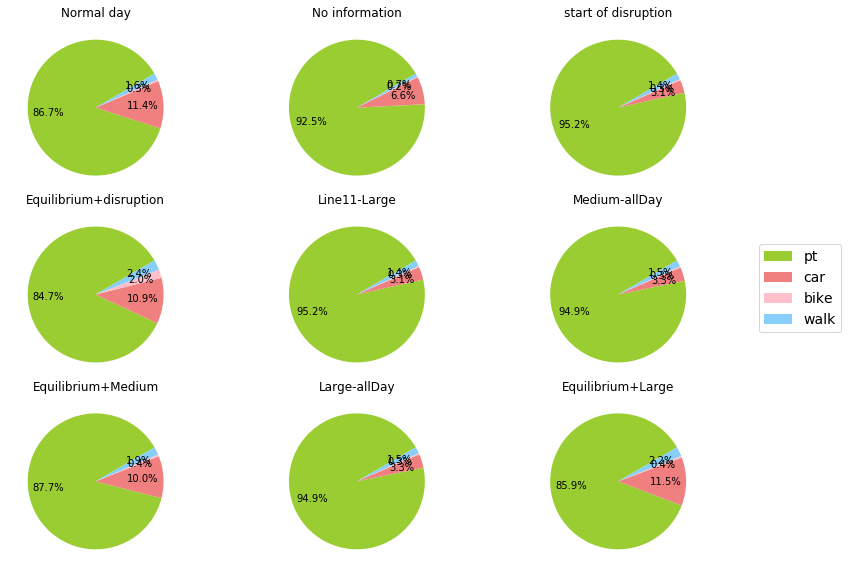

In [93]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
colors = ['yellowgreen','lightcoral','pink','lightskyblue']
#labels = 'pt', 'transit_walk', 'car', 'bike', 'walk'

for i, (idx, row) in enumerate(df_percentage_travelDis_allagent_min.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .001)]
    #ax.pie(row, autopct='%1.1f%%',startangle=30, color=colors)
    ax.pie(row,  colors=colors,
                 autopct='%0.01f%%', startangle=30, pctdistance=0.7, radius=1)
    ax.set_title(idx)

    
#fig.legend(('pt','transit_walk','car', 'walk', 'bike'), prop={'size': 8}, title = 'Scenarios')
fig.legend(labels=df_percentage_travelDis_allagent_min.columns,fontsize= 14,loc="center right")
fig.subplots_adjust(hspace=0.1, wspace=0.01)
fig.savefig("Dunat Percentage of travel time per mode choice analysis in scenarios for direct agents.pdf")    

# Mode Share Analysis

In [94]:
modeshare_allagent_WD= pd.DataFrame()
#scenarios = [df_benchmark,df_equilibrium,df_reactive,df_lineTen_ca,df_lineTen_Schedule,df_IncCap,df_IncCap_100_equi,
               # df_IncCap_20,df_IncCap_20_equi,df_line11_after4,df_current,df_zero]

#keys = ["EOD",'EWD','start of disruption','lineTen_ca','lineTen_Schedule','IncCap','IncCap_100_equi',
               # 'IncCap_20','IncCap_20_equi','line11','start of trip','no information']

for key, scenario in zip(keys,scenarios):
        modeshare_allagent_WD[key] = scenario["mode_"+key]
modeshare_allagent_WD.head()

,EOD,no information,start of disruption,EWD,line11,IncCap_20,IncCap_20_equi,IncCap,IncCap_100_equi
0,pt,pt,pt,pt,pt,pt,pt,pt,pt
1,pt,pt,pt,pt,pt,pt,pt,pt,pt
2,pt,pt,pt,pt,pt,pt,pt,pt,pt
3,pt,pt,pt,pt,pt,pt,pt,pt,pt
4,pt,pt,pt,pt,pt,pt,pt,pt,pt


In [95]:
df_modeshare_allagent_WD=pd.DataFrame()
for column in modeshare_allagent_WD:
    df_modeshare_allagent_WD[column] = modeshare_allagent_WD[column].value_counts()
    
df_modeshare_allagent_WD

,EOD,no information,start of disruption,EWD,line11,IncCap_20,IncCap_20_equi,IncCap,IncCap_100_equi
pt,317,311,372,308,372,372,332,372,315
car,109,102,40,111,40,41,87,41,104
walk,71,56,64,78,64,64,87,64,90
transit_walk,46,46,61,46,61,61,35,61,34
bike,6,5,4,4,4,4,8,4,6


In [96]:
df_modeshare_allagent_WD.rename(columns={"mode_EOD":"mode"
    ,"EOD":"Normal day",
                                         "start of disruption":"start of disruption",
                                         "no information":"No information",
                                             "EWD":"Equilibrium+disruption",
                                #"lineTen_ca":"2x10",
                                             "line11":"Line11-Large",
                                 "IncCap":"Large-allDay",
                                         "IncCap_100_equi":"Equilibrium+Large",
                                 "IncCap_20":"Medium-allDay",
                                         "IncCap_20_equi":"Equilibrium+Medium"}, inplace = True)

In [97]:
#df_modeshare_allagent_WD.rename({"leg":"pt"}, inplace=True)
df_modeshare_allagent_WD_swap= df_modeshare_allagent_WD.T
df_modeshare_allagent_WD_swap

,pt,car,walk,transit_walk,bike
Normal day,317,109,71,46,6
No information,311,102,56,46,5
start of disruption,372,40,64,61,4
Equilibrium+disruption,308,111,78,46,4
Line11-Large,372,40,64,61,4
Medium-allDay,372,41,64,61,4
Equilibrium+Medium,332,87,87,35,8
Large-allDay,372,41,64,61,4
Equilibrium+Large,315,104,90,34,6


In [98]:
df_modeshare_allagent_WD_swap.to_excel("Traveltime_raw data_directAgents.xlsx")

In [99]:
#df_modeshare_allagent_WD_swap.drop(columns={'pt'}, inplace=True)

# get Percentage

In [100]:
df_modeshare_allagent_WD_swap= df_modeshare_allagent_WD_swap[["pt","car","walk","bike"]]

In [101]:
df_percentage_allagents = df_modeshare_allagent_WD_swap.div(df_modeshare_allagent_WD_swap.sum(axis=1), axis=0).mul(100).round(2)
df_percentage_allagents

,pt,car,walk,bike
Normal day,63.02,21.67,14.12,1.19
No information,65.61,21.52,11.81,1.05
start of disruption,77.50,8.33,13.33,0.83
Equilibrium+disruption,61.48,22.16,15.57,0.80
Line11-Large,77.50,8.33,13.33,0.83
Medium-allDay,77.34,8.52,13.31,0.83
Equilibrium+Medium,64.59,16.93,16.93,1.56
Large-allDay,77.34,8.52,13.31,0.83
Equilibrium+Large,61.17,20.19,17.48,1.17


In [102]:
#df_percentage_allagents.drop('start of trip', inplace = True)

In [103]:
df_percentage_allagents.to_excel("ModeShare_percentage_tripbased_directAgents.xlsx")

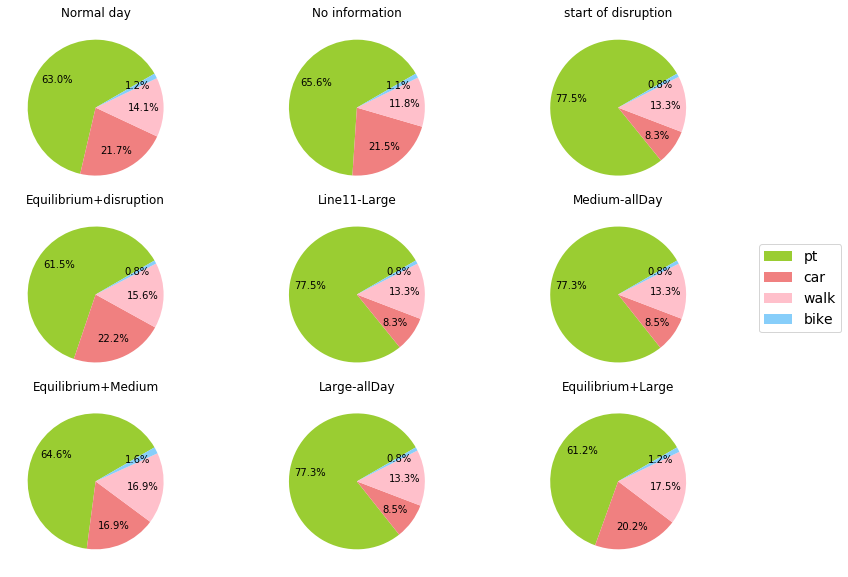

In [104]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
colors = ['yellowgreen','lightcoral','pink','lightskyblue']
#labels = 'pt', 'transit_walk', 'car', 'bike', 'walk'

for i, (idx, row) in enumerate(df_percentage_allagents.iterrows()):
    ax = axes[i // 3, i % 3]
    #row = row[row.gt(row.sum() * .001)]
    #ax.pie(row, autopct='%1.1f%%',startangle=30, color=colors)
    ax.pie(row,  colors=colors,
                 autopct='%0.01f%%', startangle=30, pctdistance=0.7, radius=1)
    ax.set_title(idx)


    
#fig.legend(('pt','transit_walk','car', 'walk', 'bike'), prop={'size': 8}, title = 'Scenarios')
fig.legend(labels=df_percentage_allagents.columns,fontsize= 14,loc="center right")
fig.subplots_adjust(hspace=0.1, wspace=0.01)
fig.savefig("Pie chart for mode analysis per trip for direct agents.pdf")

In [105]:
df_percentage_allagents_reduced=df_percentage_allagents.loc[["Normal day","start of disruption",
                                                         "Equilibrium+disruption","Medium-allDay","Equilibrium+Medium"]]

In [106]:
df_percentage_allagents_reduced.rename(columns={"pt":"PT"}, inplace=True)

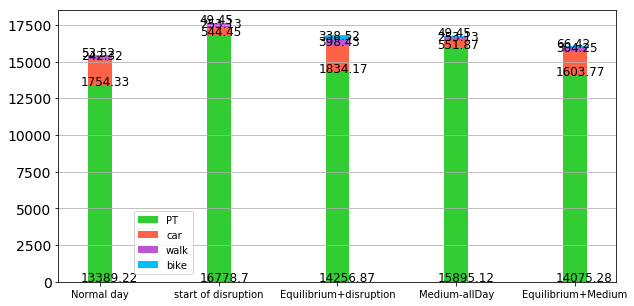

In [109]:
#colors = ['yellowgreen','lightcoral','plum','lightskyblue']
colors = ['limegreen','tomato','mediumorchid','deepskyblue']
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
#ax = (travelDis_allagent_min_swap_reduced.div(travelDis_allagent_min_swap_reduced.sum(1), axis=0)).plot(kind='bar',
 #           stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax = travelDis_allagent_min_swap_reduced.plot(kind='bar',
            stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax.yaxis.grid(True)
ax.set_facecolor('xkcd:white')
plt.legend(labels=travelDis_allagent_min_swap_reduced.columns,fontsize= 12)
plt.legend(loc='lower right', bbox_to_anchor=(0.25, 0.01))
#plt.xticks(horizontalalignment="middle")
#plt.title("Percentage of mode choice analysis in scenarios for all agents",fontsize= 16)

#plt.xticks(fontsize=10,rotation=17)
plt.xticks(fontsize=10,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks(fontsize=14)



# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate('{:0.2%}'.format(height), (x - 0.06, y +  0.03),fontsize=12,weight = 'bold')
    ax.annotate('{:}'.format(height), (x - 0.06, y +  0.01),fontsize=12)
    
plt.savefig("Percentage of travel time per mode choice analysis in scenarios for direct agents.pdf")    

c:\apps\python353\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


KeyError: 'Equilibrium without the disruption'

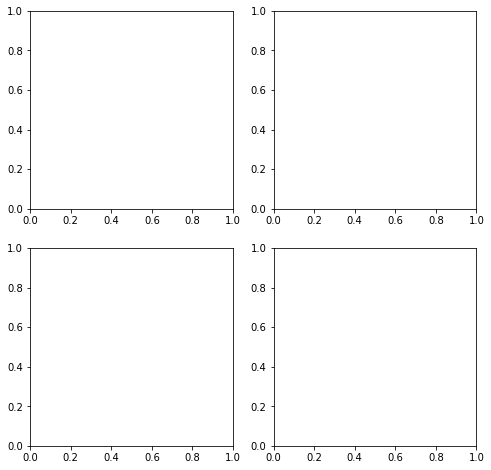

In [108]:
df_percentage_allagents_fig=df_percentage_allagents.loc[["Equilibrium without the disruption","start of disruption","Medium-allDay","Equilibrium+Medium"]]
colors = ['yellowgreen','lightskyblue','purple','pink']
fig, axes = plt.subplots(2,2, figsize=(8,8))

for idx, ax in zip(df_percentage_allagents_fig.index, axes.ravel()):
    s1, s2 = df_percentage_allagents.loc[idx].cumsum(),travelDis_allagent_min_swap.loc[idx].cumsum()
    ax.bar(s1.shift(fill_value=0),travelDis_allagent_min_swap.loc[idx],width=df_percentage_allagents.loc[idx],
            bottom=s2.shift(fill_value=0), align='edge', color=colors)
    ax.set_title(idx)
    
    

fig.tight_layout()